#                       RAPPORT PROJET MACHINE LEARNING
                 Réalisé par: EL ARGOUBI CHAIMAA

# INTRODUCTION

La classification (ou catégorisation) de textes est l’une des tâches de traitement du langage naturel (NLP : Natural Language Processing) les plus courantes. Elle consiste à associer un texte nonstructuré à une étiquette, qui correspond à une classe bien précise. Si la catégorisation de textes nécessite beaucoup d’engouement, c’est à cause de ses nombreuses applications qui vont de l’analyse de sentiments à la détection de spams en passant par la détection de langue et les systèmes de recommandation.
Le but de ce projet est de concevoir un modèle intelligent permet de classer les articles selon leur catégorie. Pour cela, on va utiliser un dataset composé de 141 articles, ces articles sont répartis en 5 catégories : sport, économie, culture, politique et société. 

On utilise python et les librairies scikit-learn (fournie avec anaconda) et NLTK (Natural Language Toolkit) qu’on peut installer avec la commande conda install -c anaconda nltk sur anaconda prompt.


# Importer des bibliothèques


nous importons les bibliothèques Python nécessaires et le jeu de données dont nous avons besoin pour cette tâche.

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import LinearSVC ,SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import *
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import string
import nltk
import re

# Importer le jeu de données


Il est maintenant temps de charger les données ! Puisque on a que 5 fichiers texte, nous allons les charger un par un dans un dataframe, puis en utilisant la fonction split() et l’expression régulier '-+[0-9]+-+' on va pouvoir séparer les articles de chaque fichier ,et finalement on va les concaténer dans une seule liste appelé ‘data’.

In [2]:
import re
files = ["28 articles société.txt","29 articles sport.txt","20 articles ecomonie.txt", "28 articles politique.txt", "36 articles culture.txt"]
data=[]
for i in files:
    with open(i, encoding="utf8") as f:
        file= f.read()
    pattern = r'-+[0-9]+-+'
    result= re.split(pattern,file)
    data.extend(result)
print(len(data))

141


maintenant on crèe un fichier "labels" qui va contenir les catégories

In [5]:
labels=open("labels.txt","w",encoding="utf8")
for i in range(1,len(data)+1):
    if i<=28:
        labels.write("société \n")
    if 28<i<=57:
        labels.write("sport\n")
    if 57<i<=77:
        labels.write("ecomonie\n")
    if 77<i<=105:
        labels.write("politique\n")
    if 105<i<=141:
        labels.write("culture\n")

In [18]:
import matplotlib.pyplot as plt
with open("labels.txt", encoding="utf8") as f:
  labels = f.read().split("\n")
for i in labels:
  if i=='':
    labels.remove(i)


In [19]:
print(len(labels))

141


# Valeurs de comptage des catégories
Il existe cinq catégories d'articles, à savoir Sport, Politique, Culture, Economie et Société.

In [11]:
import pandas
df = pandas.DataFrame(labels)
df.value_counts()

culture      36
sport        29
politique    28
société      28
ecomonie     20
dtype: int64

# Visualisation des données

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

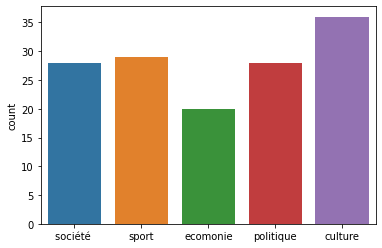

In [12]:
import seaborn as sns
sns.countplot(labels)

# Preprocessing des données
Avant de passer à la phase de classification, il faut nettoyer nos données ! Cette phase, appelée preprocessing en anglais, est essentielle et sur elle repose 80% de la réussite de tel ou tel algorithme.
Le preprocessing comporte plusieurs étapes souvent complémentaires, à savoir :
•	Normalisation du texte
•	Suppression des stopwords
•	Tokénization


In [6]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def netoyage(corpus_ensemble_documents):
    for i in range(len(corpus_ensemble_documents)):
        corpus_ensemble_documents[i]=corpus_ensemble_documents[i].lower()
    for i in range(len(corpus_ensemble_documents)):
        for c in string.punctuation:
            x=corpus_ensemble_documents[i].replace(c,' ')
            corpus_ensemble_documents[i]=x
    stopwords_anglais=stopwords.words('french')
    for i in range(len(corpus_ensemble_documents)):
        L=corpus_ensemble_documents[i].split()
        for mot in L:
            if mot in stopwords_anglais:
                while mot in L:
                    L.remove(mot)
                    
        corpus_ensemble_documents[i]=" ".join(L)
   
    return(corpus_ensemble_documents)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Après le nettoyage du texte, notre jeu de données

In [7]:
data=netoyage(data)


# Créer et ajuster le modèle MultiLabelBinarizer
Dans cette étape, nous construisons un vecteur, qui nous dirait si un caractère dans chaque phrase est un caractère fréquent ou non. Si un caractère dans une phrase est un caractère fréquent, nous le définissons comme 1, sinon nous le définissons comme 0.

Chaque fois que nous appliquons un algorithme dans NLP, il fonctionne sur les nombres. Nous ne pouvons pas alimenter directement notre texte dans cet algorithme. Par conséquent, le modèle MultiLabelBinarizer est utilisé pour prétraiter le texte en le convertissant en un sac de caractères, ce qui permet de compter les occurrences totales des caractères les plus fréquemment utilisés.

In [13]:
articles_tokens = [article.split() for article in data]
from sklearn.preprocessing import MultiLabelBinarizer
MLB = MultiLabelBinarizer()
MLB.fit(articles_tokens)


MultiLabelBinarizer()

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(articles_tokens, labels, test_size=0.3, random_state=None)

model1 = LogisticRegression()
model2=RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
model3=MultinomialNB(alpha=1.0,fit_prior=True)
model4=SVC()
model5=LinearSVC()
model6=DecisionTreeClassifier()
model8=GaussianNB()

# Régression logistique

In [16]:
#LogisticRegression
print("RESULTATS DONNES PAR LE MODELE LogisticRegression : ")
model1.fit(MLB.transform(x_train),y_train)
a=model1.score(MLB.transform(x_train),y_train)
print("accuracy sur train :",a,"%")
a2=model1.score(MLB.transform(x_test),y_test)
print("accuracy sur test :",a2,"%")


RESULTATS DONNES PAR LE MODELE LogisticRegression : 
accuracy sur train : 1.0 %
accuracy sur test : 0.8837209302325582 %


# Forêt aléatoire


In [18]:
#RandomForestClassifier
print("RESULTATS DONNES PAR LE MODELE RandomForestClassifier : ")
model2.fit(MLB.transform(x_train),y_train)
a=model2.score(MLB.transform(x_train),y_train)
print("accuracy sur train :",a,"%")
a2=model2.score(MLB.transform(x_test),y_test)
print("accuracy sur test :",a2,"%")


RESULTATS DONNES PAR LE MODELE LogisticRegression : 
accuracy sur train : 1.0 %
accuracy sur test : 0.7674418604651163 %


# Bayes naïfs multinomiaux

In [19]:
#MultinomialNB
print("RESULTATS DONNES PAR LE MODELE MultinomialNB : ")
model3.fit(MLB.transform(x_train),y_train)
a=model3.score(MLB.transform(x_train),y_train)
print("accuracy sur train :",a,"%")
a2=model3.score(MLB.transform(x_test),y_test)
print("accuracy sur test :",a2,"%")


RESULTATS DONNES PAR LE MODELE LogisticRegression : 
accuracy sur train : 1.0 %
accuracy sur test : 0.8837209302325582 %


# Machine vectorielle de support SVC

In [27]:
#SVC
print("RESULTATS DONNES PAR LE MODELE SVC : ")
model4.fit(MLB.transform(x_train),y_train)
a=model4.score(MLB.transform(x_train),y_train)
print("accuracy sur train :",a,"%")
a2=model4.score(MLB.transform(x_test),y_test)
print("accuracy sur test :",a2,"%")


RESULTATS DONNES PAR LE MODELE SVC : 
accuracy sur train : 0.9795918367346939 %
accuracy sur test : 0.5348837209302325 %


# Lineaire SVC

In [28]:
#LinearSVC
print("RESULTATS DONNES PAR LE MODELE LinearSVC : ")
model5.fit(MLB.transform(x_train),y_train)
a=model5.score(MLB.transform(x_train),y_train)
print("accuracy sur train :",a,"%")
a2=model5.score(MLB.transform(x_test),y_test)
print("accuracy sur test :",a2,"%")

RESULTATS DONNES PAR LE MODELE DecisionTreeClassifier : 
accuracy sur train : 1.0 %
accuracy sur test : 0.7674418604651163 %


# Arbre de décision

RESULTATS DONNES PAR LE MODELE DecisionTreeClassifier : 
accuracy sur train : 1.0 %
accuracy sur test : 0.5116279069767442 %


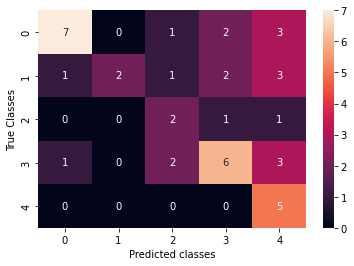

In [74]:
#DecisionTreeClassifier
print("RESULTATS DONNES PAR LE MODELE DecisionTreeClassifier : ")
model6.fit(MLB.transform(x_train),y_train)
a=model6.score(MLB.transform(x_train),y_train)
print("accuracy sur train :",a,"%")
a2=model6.score(MLB.transform(x_test),y_test)
print("accuracy sur test :",a2,"%")
y_pre=model6.predict(MLB.transform(x_test))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predicted classes')
plt.show()

# Bayes naïfs gaussiens

In [42]:
#GaussianNB
print("RESULTATS DONNES PAR LE MODELE GaussianNB : ")
model8.fit(MLB.transform(x_train),y_train)
a=model8.score(MLB.transform(x_train),y_train)
print("accuracy sur train :",a,"%")
a2=model8.score(MLB.transform(x_test),y_test)
print("accuracy sur test :",a2,"%")

RESULTATS DONNES PAR LE MODELE GaussianNB : 
accuracy sur train : 1.0 %
accuracy sur test : 0.8372093023255814 %


# Meilleur modèle pour effectuer un score de précision
Ici, après avoir formé et testé le modèle, nous constatons que le modèle Bayes naïfs multinomiaux et Régression logistique ont donné la meilleure précision de tous les modèles d’apprentissage automatique.

Maintenant, ici, après l’achèvement de l’analyse du modèle, nous pouvons prédire l'article suivant qui appartient à la catégorie 'Culture'.


In [123]:
classifier1 = LogisticRegression().fit(MLB.transform(x_train), y_train)
test=["Pour la deuxième année, la Fondation Hiba lance sa braderie musicale, et ce le samedi 18 juin 2022 au cinéma Renaissance à Rabat.Avec l’essor du streaming, on le pensait condamné. Désormais, le disque vinyle, au cours de la dernière décennie, a fait un comeback en force, précise la fondation, qui relève que les fans de musique qu’ils soient amateurs ou collectionneurs inconditionnels, considèrent le disque vinyle une forme d’art en elle-même.Qu’il s’agisse d’audiophiles à l’oreille fine, de jeunes curieux à la recherche d’une expérience authentique ou de fans d’objets musicaux physiques, les ventes du vinyle ont explosé et cela grâce à leur qualité d’écoute, leur côté insolite et nostalgique, la découverte musicale ou encore la beauté des pochettes rétro qui deviennent de véritables objets de collection, est-il encore souligné.Souk l’Oustouwanat offre aujourd’hui l’opportunité de venir à la rencontre de passionnés de musique.Après le succès de la première édition, où les différents amateurs du vintage ont exposé et vendu leurs biens, place aujourd’hui à la deuxième édition de Souk L’Oustouwnate où Fondation Hiba organise le premier marché au Maroc dédié au disque vinyle et aux biens culturels musicaux.« Souk l’Oustouwanat » (le souk à disques) a pour objectif de créer une émulation et d’encourager la rencontre des collectionneurs de disques vinyles et les audiophiles.Un appel à participation a été lancé pour repérer ces disquaires et collectionneurs à travers le Maroc."]
y_pred = classifier1.predict(MLB.transform(test))
print(y_pred)
classifier2 = model2.fit(MLB.transform(x_train), y_train)
y_pred2 = classifier1.predict(MLB.transform(test))
print(y_pred2)




C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) [' ', 'c', 'd', 'j', 'n', 'o', 'q', 's', 't', 'u', 'x', 'z', '°', 'à', 'á', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'î', 'ï', 'ñ', 'ó', 'ô', 'ö', 'ù', 'û', 'ü', 'œ', '̀', '́', '’', '“', '”'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) [' ', '(

['culture']
['culture']


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) [' ', '(', ')', ',', '-', '.', 'A', 'D', 'F', 'H', 'L', 'M', 'O', 'P', 'Q', 'R', 'S', 'U', 'c', 'd', 'j', 'n', 'o', 'q', 's', 't', 'u', 'x', 'à', 'â', 'è', 'é', 'ê', 'ô', 'ù', '’'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


# Conclusion
Enfin, après avoir nettoyé les données et prétraité les données (nettoyage des données, modèle train_test_split, création d’une liste de caractères NLP modèle et modèle d’apprentissage automatique), nous avons obtenu les scores de précision et nous pouvons dire que la classification  Bayes naïfs multinomiaux et Régression logistique donne la meilleure précision parmi tous les modèles d’apprentissage automatique.

Et enfin, nous prédisons également la catégorie d'un parmi les articles de presse.
